In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.spectral_pool import spectral_pool, max_pool, l2_loss_images
from modules.create_images import open_image, downscale_image
from modules.utils import load_cifar10

np.set_printoptions(precision=3, linewidth=200)

% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
images, _ = load_cifar10(1, get_test_data=False)

file already downloaded..
getting batch 1


In [3]:
images.shape

(10000, 32, 32, 3)

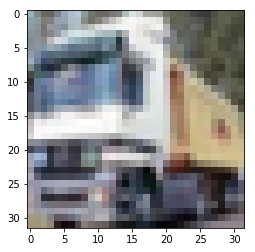

In [4]:
plt.imshow(images[1], cmap='gray')

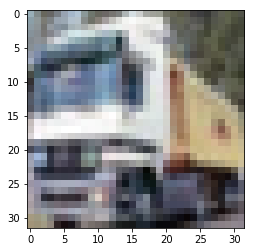

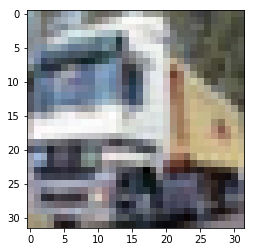

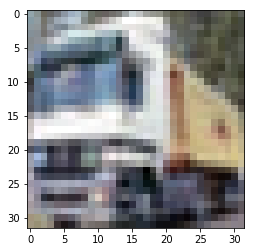

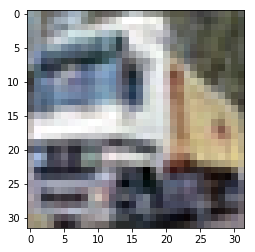

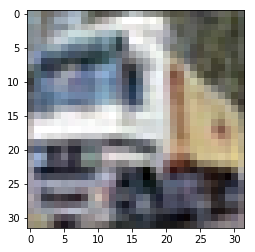

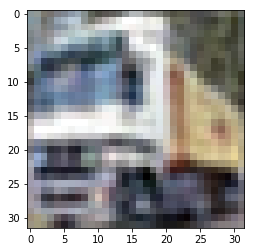

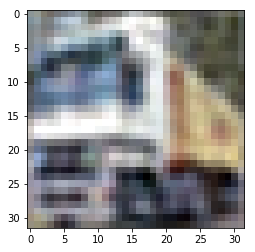

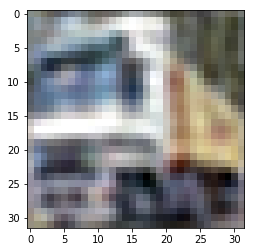

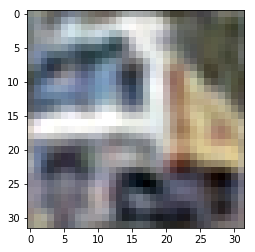

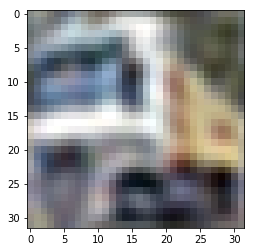

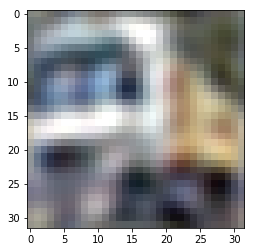

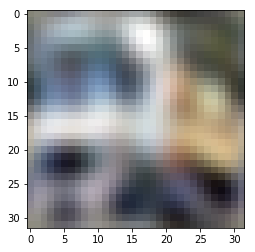

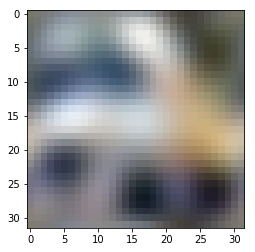

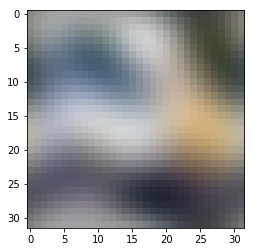

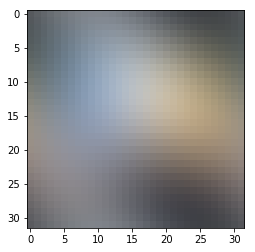

In [50]:
one_image = np.moveaxis(images[1],-1,0)
one_image_fft = np.fft.fft2(one_image)

for cutoff in range(16,1,-1):
    one_image_trunc = one_image_fft.copy()
    one_image_trunc[:,:,cutoff:(32-cutoff+1)] = 0
    one_image_trunc[:,cutoff:(32-cutoff+1),:] = 0
    one_image_back_trunc = np.real(np.fft.ifft2(one_image_trunc))
    one_image_back_clipped = np.clip(one_image_back_trunc, 0, 1)
    plt.imshow(np.moveaxis(one_image_back_clipped,0,-1),cmap='gray')
    plt.show()



In [49]:
np.min(one_image_back_trunc)

-0.048188443459048602

In [53]:
height = 8

mid = height // 2
if height % 2 == 1:
    go_to = mid + 1
else:
    go_to = mid
indexes = np.concatenate((np.arange(go_to), np.arange(mid, 0, -1))).astype(np.float32)

xs = np.broadcast_to(indexes,(height,height))
ys = np.broadcast_to(np.expand_dims(indexes,-1),(height,height))
highest_frequency = np.maximum(xs, ys)
print(highest_frequency)

[[ 0.  1.  2.  3.  4.  3.  2.  1.]
 [ 1.  1.  2.  3.  4.  3.  2.  1.]
 [ 2.  2.  2.  3.  4.  3.  2.  2.]
 [ 3.  3.  3.  3.  4.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.]
 [ 3.  3.  3.  3.  4.  3.  3.  3.]
 [ 2.  2.  2.  3.  4.  3.  2.  2.]
 [ 1.  1.  2.  3.  4.  3.  2.  1.]]


[ 3.52  4.14]
fbf
[[ 0.604  0.494  0.412 ...,  0.357  0.341  0.31 ]
 [ 0.549  0.569  0.49  ...,  0.376  0.302  0.278]
 [ 0.549  0.545  0.451 ...,  0.31   0.267  0.263]
 ..., 
 [ 0.686  0.612  0.604 ...,  0.165  0.239  0.365]
 [ 0.647  0.612  0.624 ...,  0.404  0.482  0.514]
 [ 0.639  0.62   0.639 ...,  0.561  0.561  0.561]]


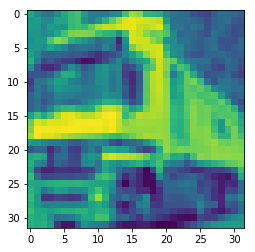

fbf_fft2
[[ 522.839 +0.j     -23.662 -6.769j    3.957-11.726j ...,   10.407-11.16j     3.957+11.726j  -23.662 +6.769j]
 [ -65.886-19.825j   14.627 -0.617j   -8.717 -8.117j ...,   -6.335+14.358j   36.132 +2.558j  -12.938+51.702j]
 [  64.908-31.496j    9.619 -5.966j    2.253-13.41j  ...,  -14.480+10.019j    0.523-24.987j   -5.869+28.04j ]
 ..., 
 [ -17.122 +6.672j    7.093 +3.659j   -0.782 +9.647j ...,   -0.893 -7.483j    1.154-11.263j  -12.633-30.462j]
 [  64.908+31.496j   -5.869-28.04j     0.523+24.987j ...,  -10.518 -5.548j    2.253+13.41j     9.619 +5.966j]
 [ -65.886+19.825j  -12.938-51.702j   36.132 -2.558j ...,    5.941-14.767j   -8.717 +8.117j   14.627 +0.617j]]
fbf_back_complex
[[ 0.604 +2.168e-19j  0.494 -8.282e-18j  0.412 +5.871e-17j ...,  0.357 -3.799e-17j  0.341 +5.784e-17j  0.310 +1.222e-16j]
 [ 0.549 -8.904e-17j  0.569 -5.638e-17j  0.490 +5.296e-17j ...,  0.376 +3.942e-17j  0.302 +2.902e-17j  0.278 +7.758e-17j]
 [ 0.549 +2.277e-17j  0.545 -1.037e-16j  0.451 +8.993e-17j ...

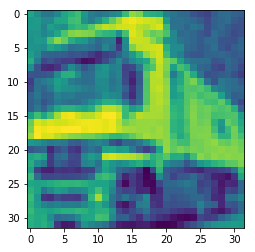

0.0196078431373
0.996078431373
0.510585171569
0.243107769678

0.0247089460784
1.00176164216
0.510585171569
0.242924299121

-0.0258118872549
0.0301930147059
1.64934255489e-17
0.00944312313144


In [19]:
mu = np.random.multivariate_normal(mean=[3.5,3.5], cov=[[1,0],[0,1]])
print(mu)

fbf = np.exp(-0.5 * (xs - mu[0]) ** 2) * np.exp(-0.5 * (ys - mu[1]) ** 2)
fbf = np.random.uniform(size=(8,8))

fbf = images[1,:,:,0]
print('fbf')
print(fbf)
plt.imshow(fbf)
plt.show()
fbf_fft2 = np.fft.fft2(fbf)
print('fbf_fft2')
print(fbf_fft2)
fbf_back_complex = np.fft.ifft2(fbf_fft2)
print('fbf_back_complex')
print(fbf_back_complex)
fbf_back = np.real(fbf_back_complex)
print('fbf_back')
print(fbf_back)
fbf_trunc = fbf_fft2.copy()
fbf_trunc[:,16] = 0
fbf_trunc[16,:] = 0
fbf_back_trunc_complex = np.fft.ifft2(fbf_trunc)
print('fbf_back_trunc_complex')
print(fbf_back_trunc_complex)
fbf_back_trunc = np.real(fbf_back_trunc_complex)
print('fbf_back_trunc')
print(fbf_back_trunc)
plt.imshow(fbf_back_trunc)
plt.show()

print(np.min(fbf))
print(np.max(fbf))
print(np.mean(fbf))
print(np.std(fbf))
print()
print(np.min(fbf_back_trunc))
print(np.max(fbf_back_trunc))
print(np.mean(fbf_back_trunc))
print(np.std(fbf_back_trunc))
print()
print(np.min(fbf_back_trunc - fbf))
print(np.max(fbf_back_trunc - fbf))
print(np.mean(fbf_back_trunc - fbf))
print(np.std(fbf_back_trunc - fbf))

In [24]:
from modules.frequency_dropout import frequency_dropout_mask


IndexError: index 16 is out of bounds for axis 0 with size 3

### max pool test

In [5]:
images_pool = max_pool(images, 2)
images_pool.shape

(10000, 32, 32, 3)

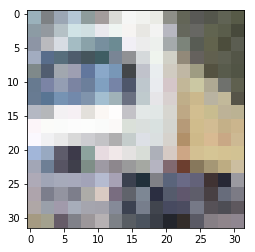

In [6]:
plt.imshow(images_pool[1], cmap='gray')

### spectral pool test

In [7]:
images.shape

(10000, 32, 32, 3)

In [8]:
images = np.moveaxis(images, -1, 1)

im_transformed (1, 3, 21, 21)
im_ifft (1, 3, 21, 21)
im_out (1, 21, 21, 3)


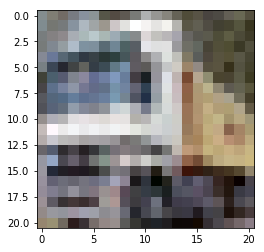

In [9]:
images_sp = spectral_pool(images[1:2], 21)[0]
plt.imshow(images_sp[0], cmap='gray')

In [ ]:
images_sp = spectral_pool(images[:10], 17)[0]
plt.imshow(images_sp[1], cmap='gray')

## Iterate and plot

In [ ]:
# calculate losses for max_pool:
pool_size_mp = [2, 4, 8, 16, 32]
max_pool_errors = []
for s in pool_size_mp:
    images_pool = max_pool(images, s)
    loss = l2_loss_images(images, images_pool)
    max_pool_errors.append(loss)

In [ ]:
# calculate losses for spectral_pool:
# takes a long time to run, could be optimized but not high priority
filter_size_sp = np.arange(1, 32, 2)
spec_pool_errors = []
for s in filter_size_sp:
    images_sp = spectral_pool(images, s)[0]
    loss = l2_loss_images(images, images_sp)
    spec_pool_errors.append(loss)

In [ ]:
pool_frac_kept = [1/x**2 for x in pool_size_mp]
sp_frac_kept = [(x/32.)**2 for x in filter_size_sp]

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.semilogy(pool_frac_kept, max_pool_errors, basey=2,
            marker='o', linestyle='--', color='r', label='Max Pooling')
ax.semilogy(sp_frac_kept, spec_pool_errors, basey=2,
            marker='o', linestyle='--', color='b', label='Spectral Pooling')
ax.legend()
ax.grid(linestyle='--', alpha=0.5)
ax.set_xlabel('Fraction of Parameters Kept')
ax.set_ylabel('Relative Loss')